In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [32]:

# The Monte carlo simulation has to do with the influence on the average energy of a 2D system.
# So generally with the monte-carlo simulation, particles are moving from one microstate to a new microstate
# (By placing one atom in a grid positon and another in a second grid position)
# And then we compute an acceptance probability of the new microstate[ This probability is usually between 0 and 1]
# This acceptance probability depends on the energy of the old state and the energy of the new state and on temperature.

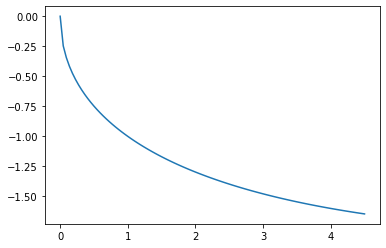

In [33]:
# function to compute FS energy for Ci of atom i
def Ei_FS(Ci):
  Ab = 1.2
  Ar = 0.2
  Ei = -Ab*np.sqrt(Ci) + Ar*Ci  # Ci = coordination of atom i(no of NN), Ab and Ar = bonding and repulsive parts respectively.
  return Ei

# plot Ei_FS
x = np.linspace(0,4.5,100)  
y = Ei_FS(x)
plt.plot(x,y)
plt.show()

In [34]:
# we initialize positions by defining an occupation matrix i.e a grid(nxn system e.g 8x8 or 10x10 system), occ(x,y) = [...,...](no atom = 0, atom = 1)
# Then we check each grid by looping, if we find an atom we compute the total energy of the individual atomic positions in the grid.

# function to compute energy of a grid of atoms
# Here we are using a 2x2 grid array.
def E_grid(occ):
  dimx, dimy = occ.shape      # dimx = dimension x, dimy = dimension y
  Etot = 0
  # set counter for number of atoms to zero
  N = 0                       
  for x in range(dimx-1):
    for y in range(dimy-1):
      if occ[x,y] == 1:  
        #found an atom
        xm = 0; xp = 0; ym = 0; yp = 0    # These are helper variables(xm = x-, xp = x+, ym = y-, yp = y+)
        N += 1  # since atom found increase N by 1
        # check for neighbours
        if x > 0:
          xm = 1 if occ[x-1,y]==1 else 0
        if x < dimx-2:
          xp = 1 if occ[x+1,y]==1 else 0
        if y>0:
          ym = 1 if occ[x,y-1]==1 else 0
        if y < dimy-2:
          yp = 1 if occ[x,y+1]==1 else 0
        # sum up neighbours
        Cxy = xm + xp + ym + yp
        # compute contribution to grid energy
        Ei = Ei_FS(Cxy)
        Etot = Etot + Ei
  return Etot/N        # This is the energy per atom.


In [35]:
# define grid
gridx = 5                 # This is an 8x8 grid.
gridy = 10

# setup microstate 1
occA = np.zeros((gridx,gridy))       # This is the way to setup a 2D array with the double brackets full of zeros. gridx = external array, gridy = internal array
occA[1,2:4] = 1
occA[1,6:8] = 1
occA[3,2] = 1    
occA[3,4] = 1 
occA[3,6] = 1
occA[3,8] = 1                 # occupying positions 2 to 5 with 1, gridx = gridx number of arrays and gridy = gridy number of elements in each gridy array.
print (occA)
EA = E_grid(occA)                    # Energy of grid A
print (EA)

# setup microstate 2 (shifted)
occB = np.zeros((gridx,gridy))
occB[1,2] = 1
occB[1,5:8] = 1 
occB[2,2:4] = 1
occB[2,6:8] = 1
print (occB)
EB = E_grid(occB)
print (EB)

# setup microstate 3 (split)
occC = np.zeros((gridx,gridy))
occC[2,2:6] = 1
occC[3,2] = 1
occC[3,5:8] = 1
print (occC)
EC = E_grid(occC)
print (EC)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
-0.5
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
-1.2083357585591885
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
-1.2227922061357854


In [36]:
# generate random occupation
def randocc(dimx,dimy,N):
  occ = np.zeros((dimx,dimy))
  count = 0
  while count <N:
    x = rd.randint(0,dimx-1)
    y = rd.randint(0,dimy-1)
    if (occ[x,y] == 0):
      occ[x,y] = 1
      count += 1
  return occ

# setup microstate 4
occC = randocc(gridx,gridy,15) # 15 here is gotten from the 5x10 grid which is 5+10
print (occC)
ED = E_grid(occC)
print (ED)

# function to compute acceptance probability
def prob(Eold,Enew,kT):
  if Enew > Eold:
    prob = np.exp(-(Enew-Eold)/kT)
  else:
    prob = 1.
  return prob

# compute probability for transition between microstates
kT=0.025
print ("EB->EA",EB,EA,prob(EB,EA,kT))   # These are the energies of transiton from one state to another (EB to EA)
print ("EA->EB",EA,EB,prob(EA,EB,kT))
print ("EC->EA",EC,EA,prob(EC,EA,kT))
print ("EA->EC",EA,EC,prob(EA,EC,kT))

[[0. 1. 0. 1. 1. 0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]]
-0.5994647772450389
EB->EA -1.2083357585591885 -0.5 4.953903573745442e-13
EA->EB -0.5 -1.2083357585591885 1.0
EC->EA -1.2227922061357854 -0.5 2.778518754252942e-13
EA->EC -0.5 -1.2227922061357854 1.0


In [37]:


# Monte Carlo simulation
kT      = 0.001
MCsteps = 100

Naccept=0
occ_old = np.zeros((gridx,gridy))
occ_new = np.zeros((gridx,gridy))
occ_old = randocc(gridx,gridy,16)
E_old = E_grid(occ_old)
for step in range(MCsteps):
  occ_new = randocc(gridx,gridy,16)
  E_new = E_grid(occ_new)
  # Now we compare our probability with our statistical distribution.
  if (prob(E_old,E_new,kT)) > rd.uniform(0,1):
    # accept new state
    E_old = E_new
    occ_old = occ_new
    Naccept +=1
    print (occ_new)
    print (step,Naccept,E_new)

# (n over k) = n!/(n-k!*k!)
from math import factorial
factorial(64)/(factorial(16)*factorial(64-16))

[[1. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [1. 1. 1. 0. 0. 0. 1. 1. 1. 0.]
 [1. 1. 1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
0 1 -1.172035329653608
[[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]]
70 2 -1.17876225312968
[[0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]]
89 3 -1.1874005719027723


488526937079580.0